# I only made a turn relative to the center

import cv2
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    #axs.axis('off')
    plt.plot()

(768, 1024)


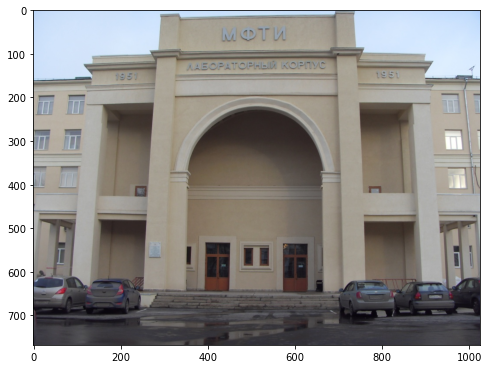

In [5]:
test_image = cv2.imread('C:/Users/User!!!!!!!!/cv_mipt_minor-master/week_01_images/homework/task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
print(test_image.shape[:2])



In [6]:
def quarter(angle):
    if abs(angle)>=360:
        angle2 = angle - 360*(angle//360)
    else:
        angle2=angle
    sq = [1,2,3,4]
    y = sq[math.floor(angle2/90)]
    angle2 = angle2 - 90*(angle2//90)
    if y==2 or y==4:
        return (y,-(90-angle2))
    return (y,angle2)

768 1024
(512.0, 384.0)
-71
cord  384.0 512.0
1218 1059
17 225


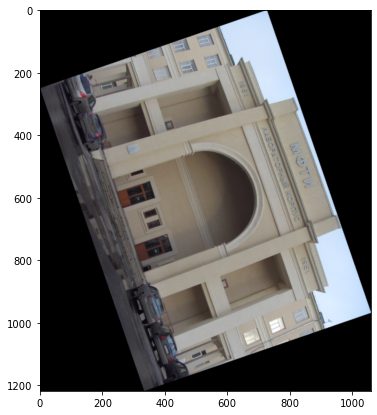

In [12]:
def rot(image, point, angle):
    rows, cols, _ = image.shape
    print(rows,cols)
    print(point)
    
    xold=cols//2
    yold=rows//2
    #print(yold, xold)
    angle2=quarter(angle)[1]
    q=quarter(angle)[0]
    print(angle2)
    
    #r=math.sqrt((rows/2)**2 + (cols/2)**2)
    r=math.sqrt((abs(rows-point[1]))**2 + abs(cols-point[0])**2)
    y=r*math.sin(abs(angle2)*math.pi/180 + math.atan2(rows, cols))+rows/2
    x=r*math.cos(abs(angle2)*math.pi/180 - math.atan2(rows, cols))+cols/2
    print("cord ",abs(rows-point[1]), abs(cols-point[0]))
    
    rows+=2*abs(rows-y)
    cols+=2*abs(cols-x)
    rows=int(rows)
    cols=int(cols)
    print(rows,cols)
    
    M = cv2.getRotationMatrix2D(point, angle2, scale = 0.5)
    dst = cv2.warpAffine(image.copy(), M, (cols, rows))
    
    M2 = np.float32([[1, 0, abs(cols//2-xold)],
                     [0,  1,  abs(rows//2-yold)]]) 
    dst2 = cv2.warpAffine(dst.copy(), M2, (cols, rows))
    print(abs(cols//2-xold),abs(rows//2-yold))
    
    M3 = cv2.getRotationMatrix2D((cols//2, rows//2), 0, scale = 2)
    dst3 = cv2.warpAffine(dst2.copy(), M3, (cols, rows))
    
    if (q==2):
        dst3 = cv2.flip(dst3, -1)
        
    if (q==3):
        dst3 = cv2.flip(dst3, -1)
    return dst3
    

(h, w) = test_image.shape[:2]
center = (w / 2, h / 2)
test_point = (100,100)
test_angle = 289
aimage=rot(test_image, center, test_angle)
plot_one_image(aimage)
#transformed_image = rotate(test_image, test_point, test_angle)
#plot_one_image(transformed_image)